### PCA for Data Visualization

**PCA** : Technique to Reduce Dimensionality of a Dataset while losing least amount of Information.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
species = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
df.loc[:, 'target'] = df.loc[:,'target'].apply(lambda x : species[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Standardize Data

In [4]:
X = df.iloc[:, :-1].values
y = df.loc[:,['target']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
print(f'Mean : {scaler.mean_}\n')
print(f'Variance : {scaler.var_}\n')
print(f'Scales : {scaler.scale_}\n')
print(f'Number of Features : {scaler.n_features_in_}\n')
print(f'Number of Samples : {scaler.n_samples_seen_}\n')
print(f'Parameters : {scaler.get_params()}')

Mean : [5.84333333 3.05733333 3.758      1.19933333]

Variance : [0.68112222 0.18871289 3.09550267 0.57713289]

Scales : [0.82530129 0.43441097 1.75940407 0.75969263]

Number of Features : 4

Number of Samples : 150

Parameters : {'copy': True, 'with_mean': True, 'with_std': True}


### PCA Projection to 2D

Dataset consist of 4 Features ( 4 Dimensions )

PCA will Reduce the Dataset to 2D ( 2 Important Features )

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)
pc = pd.DataFrame(data=components, columns=['Principal Component 1', 
                                            'Principal Component 2'])

### Visualize 2D Projection

In [7]:
project = pd.concat([pc, df['target']], axis=1)

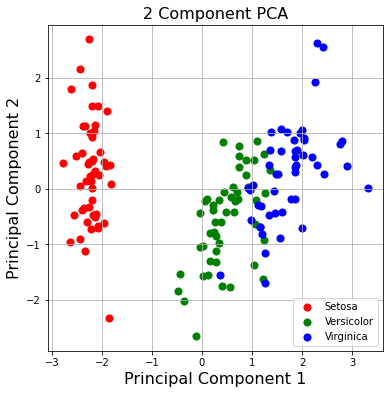

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
labels = df.loc[:,'target'].unique()
colors = ['r','g','b']
for label, color in zip(labels, colors):
    indices = project['target'] == label
    ax.scatter(project.loc[indices, 'Principal Component 1'], 
               project.loc[indices, 'Principal Component 2'],
               c=color, s=50)
    ax.set_xlabel('Principal Component 1', fontsize=16)
    ax.set_ylabel('Principal Component 2', fontsize=16)
    ax.set_title('2 Component PCA', fontsize=16)
    ax.legend(labels)
    ax.grid();

Setosa Class is well Seperated from Versicolor and Virginica

### Explained Variance

When you Reduce Dimensions of Data you loose some **Variance** ( Information )

In [9]:
print(f'Explained Variance : {pca.explained_variance_ratio_*100}')

Explained Variance : [72.96244541 22.85076179]


In [10]:
print(f'Sum of Variance : {sum(pca.explained_variance_ratio_)*100:.2f}%')

Sum of Variance : 95.81%


Together the 2 Principal Components contains **96%** of the Information.

1<sup>st</sup> Component contains **73%** of Variance and 2<sup>nd</sup> Component contains **23%** of Variance.


### PCA to speed up Machine Learning Algorithms

Train your Model in Parallel using **n_jobs** 

Reduce the Number of Columns and Rows ( Without Losing Information )

### Dataset

In [11]:
df = pd.read_csv('../Data/MNIST.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Visualize Each Digit 

In [12]:
features = df.columns[:-1]

In [13]:
image_values = df.loc[0, features].values

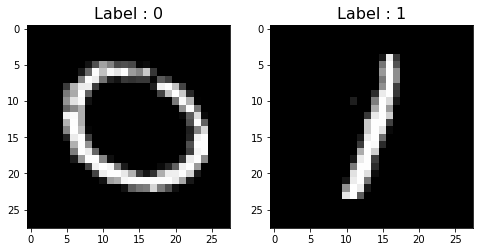

In [14]:
plt.figure(figsize=(8,4))
for index in range(0,2):
    plt.subplot(1,2,1+index)
    image_values = df.loc[index, features].values
    image_labels = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap='gray')
    plt.title(f'Label : {image_labels}', fontsize=16);

### Splitting Data into Train Set and Test Set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df['label'], 
                                                    random_state=0)

### Standardize the Data

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaled_image = X_train.copy()

### PCA - Logistic Regression

In [17]:
'''
n_components = 0.90 means Scikit Learn will choose 
Minimum Number of Prinicipal Components such that
90% of Variance is Retained
'''

pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Number of Dimensions before PCA : {len(features)}')
print(f'Number of Dimensions after PCA : {pca.n_components_}')
print(f'Classification Accuracy : {model.score(X_test, y_test)*100:.2f}%')

Number of Dimensions before PCA : 784
Number of Dimensions after PCA : 104
Classification Accuracy : 99.70%


#### Relationship between Cumulative Explained Variance and Number of Principal Components.

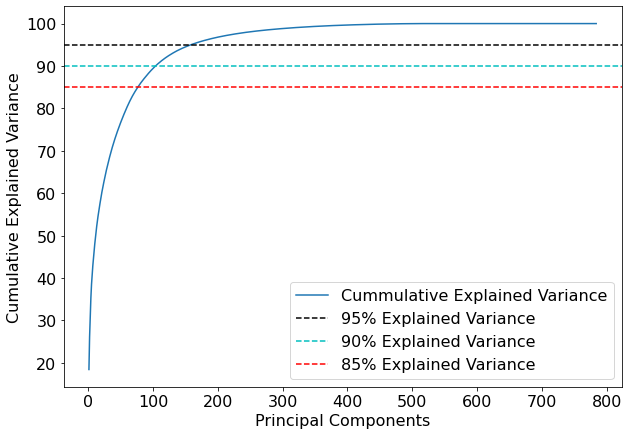

In [18]:
pca = PCA()

pca.fit(scaled_image)

# Total Explained Variance
total_variance = sum(pca.explained_variance_)

var_exp = [(i/total_variance)*100 for i in sorted(pca.explained_variance_, 
                                                  reverse = True)]
import numpy as np
# Cumulative Explained Variance
cum_var_exp = np.cumsum(var_exp)

# Plot Explained Variance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.tick_params(labelsize=16)
ax.plot(range(1,785), cum_var_exp, label='Cummulative Explained Variance')
ax.set_ylabel('Cumulative Explained Variance', fontsize=16)
ax.set_xlabel('Principal Components', fontsize=16)
ax.axhline(y=95, color='k', linestyle='--', label='95% Explained Variance')
ax.axhline(y=90, color='c', linestyle='--', label='90% Explained Variance')
ax.axhline(y=85, color='r', linestyle='--', label='85% Explained Variance')
ax.legend(loc='best', markerscale=1.0, fontsize=16);